## Question 4

Below is a extract of shot data from a seismic survey.

|  Time (ms)  |  Shot  |
|-----|-----|
| 0 | -0.021373 |
| 4 | -0.024578 |
| 8 | -0.023914 |
| 12 | -0.018227 |
| 16 | -0.00781 |
| 20 | 0.005602 |
| 24 | 0.019264 |
| 28 | 0.030235 |
| 32 | 0.036059 |
| 36 | 0.035334 |

 1. Calculate the Lagrange polynomial for these points. Plot both the Lagrange polynomial and the raw data points.
 2. The full shot is available in the file [shot.txt](data/shot.txt) (in the data folder) - where the sample interval is 4ms as above. Note that the file only contains one column as you can calculate the time column yourself. Use cubic-polynomial splines to re-interpolate the data for a sample interval of 7.07ms. Plot both the original shot data and the interpolated time series.


In [ ]:
import numpy as np
from scipy.interpolate import lagrange, CubicSpline
import matplotlib.pyplot as plt

# Expiremental data given from table
times = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])
shot_values = np.array([
    -0.021373, -0.024578, -0.023914, -0.018227,
    -0.00781,  0.005602,  0.019264,  0.030235,
     0.036059, 0.035334
])

## Perform langrange polynomial with time and hot_values
polynome_lagrange = lagrange(times, shot_values)

endTime = np.linspace(0, 36, 200)
shot_interpole = polynome_lagrange(endTime)

# print lagrange polynome
print(shot_interpole)


[-0.021373   -0.02156651 -0.02175784 -0.02194654 -0.02213219 -0.02231437
 -0.0224927  -0.02266681 -0.02283635 -0.02300099 -0.02316041 -0.02331431
 -0.02346241 -0.02360443 -0.02374012 -0.02386922 -0.02399151 -0.02410674
 -0.02421471 -0.02431521 -0.02440805 -0.02449302 -0.02456996 -0.02463868
 -0.02469902 -0.02475082 -0.02479392 -0.02482819 -0.02485348 -0.02486966
 -0.02487659 -0.02487416 -0.02486225 -0.02484074 -0.02480955 -0.02476855
 -0.02471766 -0.02465679 -0.02458586 -0.02450479 -0.0244135  -0.02431193
 -0.02420001 -0.0240777  -0.02394493 -0.02380166 -0.02364786 -0.02348349
 -0.02330851 -0.02312292 -0.02292669 -0.02271981 -0.02250227 -0.02227409
 -0.02203526 -0.0217858  -0.02152573 -0.02125508 -0.02097388 -0.02068216
 -0.02037998 -0.02006738 -0.01974443 -0.01941118 -0.01906771 -0.01871411
 -0.01835044 -0.01797681 -0.01759331 -0.01720004 -0.01679712 -0.01638466
 -0.01596278 -0.01553162 -0.01509131 -0.014642   -0.01418382 -0.01371694
 -0.01324152 -0.01275772 -0.01226572 -0.01176568 -0

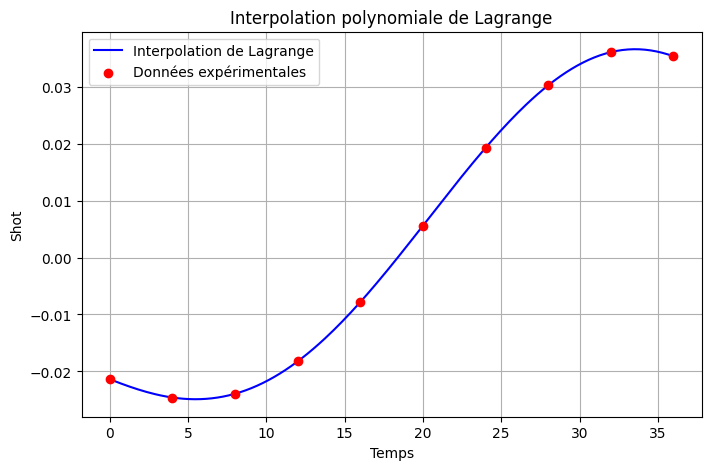

In [ ]:
# Création du graphique
plt.figure(figsize=(8, 5))
plt.plot(endTime, shot_interpole, label="Interpolation of Lagrange", color="blue")
plt.scatter(times, shot_values, color="red", zorder=3, label="Expiremental data")

# Mise en forme
plt.xlabel("Times")
plt.ylabel("Shot")
plt.title("Interpolation polynomiale of Lagrange")
plt.legend()
plt.grid(True)

# Affichage
plt.show()

In [4]:
#2. 
# upload shot.txt
data = np.loadtxt("data/shot.txt")
n = len(data)
fullTime = np.arange(0, n*4, 4)


cs = CubicSpline(fullTime, data)

# new grid of 7.07 ms
timeIntercept= np.arange(0, fullTime[-1], 7.07)
dataIntercept = cs(timeIntercept)

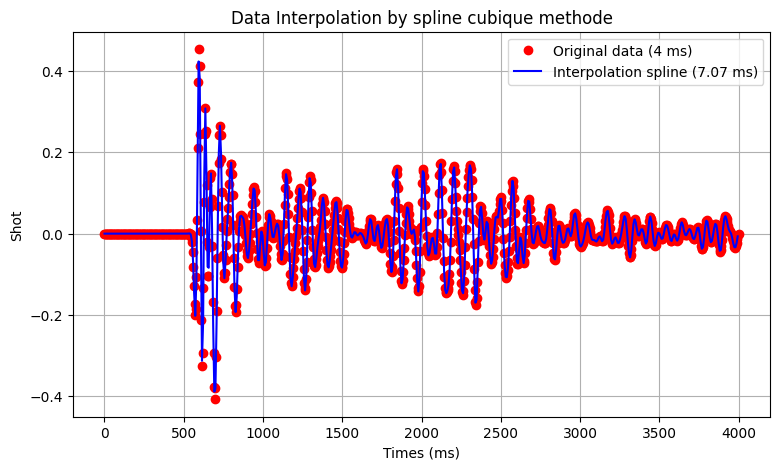

In [6]:
# Graphique
plt.figure(figsize=(9, 5))

plt.plot(fullTime, data, 'o', label="Original data (4 ms)", color="red")
plt.plot(timeIntercept, dataIntercept, '-', label="Interpolation spline (7.07 ms)", color="blue")

plt.xlabel("Times (ms)")
plt.ylabel("Shot")
plt.title("Data Interpolation by spline cubique methode")
plt.legend()
plt.grid(True)

plt.show()